In [1]:
"""dysfunctional programming in python"""
__version__ = "0.2.3"
__all__ =  "λ", "Λ", "poser", "this", "star"

`λ` is an `object` for fluent function composition in `"python"` based on the `toolz` library.

1.  [__Motivation__](#Motivation)
2. [__Source__](#Source)
3. [__Tests__](#Tests)

#### Motivation

[Function composition](https://en.wikipedia.org/wiki/Function_composition) is a common task in mathematics and modern programming.
Object oriented function composition often breaks with conventional representations.
The `toolz` library provides a set of functional programming objects to `compose` and `pipe` functions together.
`compose` and `pipe` are top level composition functions that how two different typographic conventions.

In the `toolz` example, both `f and g` are the same

1. `compose` mimics a symbollic function composition.

        f = compose(type, len, range)
    
1. `pipe` allows a fluent composition.

        g = lambda x: pipe(x, range, len, type)
        def h(x: int) -> type: return pipe(x, range, len, type)
        
The typology of the `compose` composition is destructive to the flow of literature because it must be read `reversed`. 
`pipe` on the other hand supplements the narrative providing literate compositions aligned with the direction of the literature.

From a learning perspective, my experience with `poser` & its predecessors have taught me a lot about the pythonic data model.
`Compose` expresses a near complete symbollic API for function composition.

In [2]:
    import toolz, abc, inspect, functools, operator, typing, importlib, builtins, pathlib, operator, ast, itertools, sys, re
    from toolz.curried import *

#### Source

`Compose` augments `toolz.Compose` to provide a fluent & symbollic object for function composition in python.

## Function Composition base class.

In [3]:
    class State:
        def __getstate__(self):
            return tuple(
                getattr(self, x) for x in self.__slots__
            )
        def __setstate__(self, state):
            tuple(
                setattr(self, x, v) for x, v in zip(self.__slots__, state)
            )        

In [4]:
    class Composition(State, toolz.functoolz.Compose):
        """Extensible function partial composition that excepts Exceptions.
        
    All of position is overlay on the toolz library that supports conventions for functional programming in python.
    The toolz documentation are some of the best in python.
        
    >>> Composition([list, range], 5)(10)
    [5, 6, 7, 8, 9]
    
    λ or poser is a convenience type for building compositions.
    
    >>> λ(5).partial(range).list()(10)
    [5, 6, 7, 8, 9]
    
    """
        __slots__ = toolz.functoolz.Compose.__slots__ + tuple("args kwargs exceptions".split())
        
        def __init__(self, funcs=None, *args, **kwargs): 
            """Compose stores args and kwargs like a partial."""
            super().__init__(funcs or (I,))
            self.args, self.exceptions, self.kwargs = args, kwargs.pop('exceptions', tuple()), kwargs
        
        def __iter__(self):
            """Iterate over the functions in a Composition.
        
        >>> Composition([range], 1)
        Composition(<class 'range'>,)
        """
            yield self.first
            yield from self.funcs
            
        def __bool__(self): 
            """Composition is inherited as a metaclass later.
            
        >>> assert λ() ^ λ
            
        Composition is True for both types and objects.

        >>> assert bool(Composition) and bool(Composition())
            """
            return not isinstance(self, type)
        
        def __call__(self, *args, **kwargs):
            """Call a partial composition with args and kwargs.
            
        >>> Composition([range, enumerate, dict], 5) 
        Composition(<class 'range'>, <class 'enumerate'>, <class 'dict'>)
        """
            if not isinstance(self, star):
                # A starred method has already consumed the args and kwargs.
                args, kwargs = getattr(self, "args", ()) + args, {**getattr(self, "kwargs", {}), **kwargs}
                
            # Iterate over the callables in the Composition piping 
            # the output across each function
            for callable in self: 
                try:
                    args, kwargs = (callable(*args, **kwargs),), {}
                    object = args[0]
                except self.exceptions as Exception: 
                    # If an exception is trigger we return a Ø exception
                    # that is False and can be used in logical circuits.
                    return Ø(Exception)
            return object
        
        def __len__(self):
            """A Composition's length is measured by the number of functions.
            
        >>> assert len(λ()) ^ len(λ)
        """ 
            return 0 if isinstance(self, type) else (self.funcs and len(self.funcs) or 0)+1
        
        def partial(self, object=None, *args, **kwargs):
            """Append a callable-ish object with partial arguments to the composition.
            
        partial can be chained to compose complex functions..
            
        >>> assert Composition().partial(range).partial().partial(type)(1) is range
        
            """
            if object is not None:
                object = juxt(object)
            
            if isinstance(self, type) and issubclass(self, Composition): 
                # if the object isn't instantiated, instantiate it.
                self = self()
            if isinstance(object, Λ): pass # When using a fat lambda because we can't inspect it's attributes.
            else:  
                if object is None: 
                    # None is a valid answer
                    return self
                if isinstance(object, slice): 
                    # slices are weird
                    if normal_slice(object):
                        # normal slices operate on a lists of functions.
                        return type(self)(funcs=list(self)[object])
                    else:
                        # slices of callable are crazy!
                        # They provide access to the common filter, map, pipe pattern.
                        # slice(filter, map, pipe)
                        callable(object.start) and self.filter(object.start)
                        callable(object.stop) and self.map(object.stop)
                        callable(object.step) and self.partial(object.step)
                        return self
            
            # ball the object into a partial when args or kwargs are provided
            if args or kwargs: 
                object = toolz.partial(object, *args, **kwargs)  
                
            # update the functions in the composition
            if self.first is I:
                # the first function is identity we know that functions have not been added to the composition.
                # the first attribute is inherited from toolz.
                self.first = object
            else: 
                # append the callable object
                self.funcs += object,
            return self

In [5]:
    def istype(object, cls):
        """A convenience function for checking if an object is a type."""
        return isinstance(object, type) and issubclass(object, cls)

In [6]:
    def normal_slice(slice):
        return all(
            isinstance(x, (int, type(None)))
            for x in operator.attrgetter(*'start stop step'.split())(slice)
        )

In [7]:
    class Ø(BaseException):
        def __bool__(self): return False

In [8]:
    def I(*tuple, **_): "A nothing special identity function, does pep8 peph8 me?"; return tuple[0] if tuple else None

### Forward reference to `sys.modules`

In [9]:
    class Forward(State, typing.ForwardRef, _root=False):
        """A forward reference implementation that accesses object off of the sys.modules"""
        def __new__(cls, object=None, *args, **kwargs):
            if not isinstance(object, (str, type(None))):
                return object
            if isinstance(object, str):
                try:
                    ast.parse(object)
                except SyntaxError:
                    return object  # if the forward reference isn't valid code...
            self = super().__new__(cls)
            if object is not None:
                self.__init__(object, *args, **kwargs)
            return self
        
        def __call__(self, *args, **kwargs):
            object = self._evaluate()
            return object(*args, **kwargs) if callable(object) else object
        
        def _evaluate(self, globalns=None, localns=None):
            self.__forward_value__ = _evaluate(self.__forward_arg__)
            self.__forward_evaluated__ = True
            return self.__forward_value__
        
        def __repr__(x): return repr(x._evaluate()) if x.__forward_evaluated__ else super().__repr__()        
        @property
        def __signature__(x): return inspect.signature(x._evaluate())
        @property  
        def __doc__(x): return inspect.getdoc(x._evaluate())
        def __str__(x): return x.__forward_arg__

    def _evaluate(object, property=None):
        """Take a dotted string and return the object it is referencing.
        
    Used by the Forward types."""
        try:
            object = importlib.import_module(object)
            if property is None: return object
        except ModuleNotFoundError: 
            module, sep, next = object.rpartition('.')
            property = next if property is None else F"{next}.{property}"
        else: return operator.attrgetter(property)(object)
        return _evaluate(module, property)

### Overloaded `map` and `filter` objects.    

In [10]:
    def map(callable, object, key=None):
        """A general `map` function for sequences and containers."""
        property = builtins.map
        if isinstance(object, typing.Mapping):
            if key is not None: object = getattr(toolz, F"key{property.__name__}")(key, object)
            return getattr(toolz, F"val{property.__name__}")(callable, object)
        return getattr(toolz, property.__name__)(callable, object)           

    def filter(callable, object, key=None):
        property = builtins.filter
        if isinstance(object, typing.Mapping):
            if key is not None: object = getattr(toolz, F"key{property.__name__}")(key, object)
            return getattr(toolz, F"val{property.__name__}")(callable, object)
        return getattr(toolz, property.__name__)(callable, object)

### Juxtaposition.

In [11]:
    class juxt(toolz.functoolz.juxt):
        """An overloaded toolz juxtaposition that works with different objects and iterables."""
        def __new__(self, funcs=None):
            if funcs is None: 
                self = super().__new__(self)
                return self.__init__() or self
            if isinstance(funcs, str): funcs = Forward(funcs)
            if callable(funcs) or not toolz.isiterable(funcs): return funcs
            self = super().__new__(self)
            return self.__init__(funcs) or self
        
        def __init__(self, object=None):
            self.funcs = object
            
        def __call__(self, *args, **kwargs):
            if isinstance(self.funcs, typing.Mapping):
                # Juxtapose a mapping object.
                object = type(self.funcs)()
                for key, value in self.funcs.items():
                    if callable(key): key = juxt(key)(*args, **kwargs)
                    if callable(value): value = juxt(value)(*args, **kwargs)
                    object[key] = value
                return object
            if toolz.isiterable(self.funcs): 
                # juxtapose an iterable type that returns the container type
                return type(self.funcs)(
                    juxt(x)(*args, **kwargs) 
                    if (callable(x) or toolz.isiterable(x)) else x 
                    for x in self.funcs)                    
            if callable(self.funcs): 
                # call it ya can
                return self.funcs(*args, **kwargs)
            return self.funcs

In [12]:
    class Extensions:
        _fold = {}
        _partial = {}
        _method = {}


In [13]:
    def fold(callable, *args, **kwargs):
        @functools.wraps(callable)
        def call(*a, **k):
            return callable(*a, *args, **{**kwargs, **k})
        return call

In [14]:
    class Compose(Composition, Extensions):
        """An extended API for function compositions that allow contiguous functional compositions
        using a fluent and symbollic API.
        
        """
        def partial(x, object=None, *args, **kwargs):
            if object is Ellipsis: return x() # call when we see ellipsis.
            return Composition.partial(x, object, *args, **kwargs)
            
        @property
        def __doc__(x): 
            """The first object is the documentation."""
            return inspect.getdoc(x.first)
        
        @property
        def __signature__(x): 
            """Like the doc, the signature comes from the first function."""
            return inspect.signature(x.first)


        # +, -, >>, and [] append partials.
        # multiple symbols make it possible to append functions
        # in different places in python's order of operations.
        __pos__ = __rshift__ = __sub__ = __rsub__ = __isub__ = __add__ = __radd__ = __iadd__ = __getitem__ = partial
                
        
        """Mapping, Filtering, Groupby, and Reduction."""
        def map(λ, callable, key=None):
            """Append an overloaded map that works with iterables and mappings."""
            if callable is not None:
                callable = juxt(callable)
            if key is not None:
                key = juxt(key)
            return λ[toolz.partial(map, callable, key=key)]
        
        
        # * appends a map to the composition
        __mul__ = __rmul__ = __imul__ = map
                
        # / appends a filter to the composition
        def filter(λ, callable, key=None):
            """Append an overloaded map that works with iterables and mappings."""
            if callable is not None:
                callable = juxt(callable)
            if key is not None:
                key = juxt(key)
            return λ[toolz.partial(filter, callable, key=key)]
        
        __truediv__ = __rtruediv__ = __itruediv__ = filter 
        
        @functools.wraps(toolz.groupby)
        def groupby(λ, callable, *args, **kwargs): 
            return λ[toolz.curried.groupby(juxt(callable))]
        __matmul__ = __rmatmul__ = __imatmul__ = groupby
        
        def reduce(λ, callable): return λ[toolz.curried.reduce(juxt(callable))]
        __mod__ = __rmod__ = __imod__ = reduce
        
        """Conditionals."""
        def excepts(x, *Exceptions): return λ(exceptions=Exceptions)[x]
        __xor__ = excepts
        
        def ifthen(λ, callable): return IfThen(λ)[callable]
        __and__ = ifthen
        
        def ifnot(λ, callable): return IfNot(λ)[callable]
        __or__ = ifnot
        
        def issubclass(λ, object): 
            return λ[toolz.partial(toolz.flip(istype), object)]
        
        def isinstance(λ, object): 
            return λ[toolz.partial(toolz.flip(isinstance), object)]
            
        def condition(λ, object):
            return IfThen(λ.isinstance(object) if isinstance(object, (tuple, type)) else λ[object])
        __pow__ = __ipow__ = condition
        
        def skip(self, bool:bool=True): return bool and self.off() or self.on()
        def on(self): return self
        def off(self): return self[:-1]
                
        
        def do(λ, callable): return λ[toolz.curried.do(juxt(callable))]
        __lshift__ = do
                
        def complement(x, object=None): return λ[toolz.complement(x)] if object == None else x[toolz.complement(object)]
        __neg__ = complement
        def flip(x, object=None): return λ[toolz.flip(x)] if object == None else x[toolz.flip(object)]
        __invert__ = flip
        
        
        def __abs__(x): return Composition(*(object for object in reversed((x.first,) + x.funcs)))
        def __reversed__(x):
            new = +type(x)
            for object in reversed((x.first,) + x.funcs): new[object]
            else: return new
            
        """Object tools"""
        def attrgetter(this, *args, **kwargs): return this[operator.attrgetter(*args, **kwargs)]
        def itemgetter(this, *args, **kwargs): return this[operator.itemgetter(*args, **kwargs)]
        def methodcaller(this, *args, **kwargs): return this[operator.methodcaller(*args, **kwargs)]
        
        def _ipython_key_completions_(self):
            object = []
            try:
                object = __import__('IPython').core.completerlib.module_completion('import')
            except: return [] # we wont need this if ipython ain't around
            return object + list(itertools.chain(*[
                [F"{k}.{v}" for v in dir(v) if not v.startswith('_')] for k, v in sys.modules.items()
            ]))
        
        def __getattribute__(cls, str):
            try:
                return object.__getattribute__(cls, str)
            except AttributeError as e: Exception = e
            if str in cls._partial:
                @functools.wraps(cls._partial[str])
                def defer(*args, **kwargs):
                    nonlocal str, cls
                    return cls.partial(cls._partial[str], *args, **kwargs)
                return defer
            elif str in cls._fold:
                @functools.wraps(cls._fold[str])
                def defer(*args, **kwargs):
                    nonlocal str, cls
                    return cls.partial(fold(cls._fold[str], *args, **kwargs))
                return defer                

            elif str in cls._method:
                @functools.wraps(cls._method[str])
                def defer(*args, **kwargs):
                    nonlocal str, cls
                    return cls.partial(cls._method[str](*args, **kwargs))
                return defer                
            raise Exception
        
        def __dir__(cls):
            return sorted(super().__dir__(cls) + sum(map(list, (cls._method, cls._ffold, cls._partial)), []))
        
        def first(cls):
            return cls[iter][next]

## Conditional compositions

In [15]:
    class Conditional(Compose):
        __slots__ = Compose.__slots__ + ('predicate',)
        def __init__(self, predicate, *args, **kwargs): self.predicate = super().__init__(*args, **kwargs) or predicate
            
    class IfThen(Conditional):
        def __call__(self, *args, **kwargs):
            object = self.predicate(*args, **kwargs)
            return super().__call__(*args, **kwargs) if object else object
        
    class IfNot(Conditional):
        def __call__(self, *args, **kwargs):
            object = self.predicate(*args, **kwargs)
            return object if object else super().__call__(*args, **kwargs)

## Compositional types.

In [16]:
    class Type(abc.ABCMeta, Extensions): 
        __getattribute__ = Compose.__getattribute__
        def __dir__(cls):
            return sorted(super().__dir__() + sum(map(list, (cls._method, cls._fold, cls._partial)), []))
        partial = Compose.partial

        __getitem__ = Compose.__getitem__
    _type_method_names = set(dir(Type))
    for attr in (
        set(dir(Compose))
        - (set(dir(toolz.functoolz.Compose)))
        - set("__weakref__ __dict__".split())
    ):
        setattr(Type, attr, getattr(Type, attr, getattr(Compose, attr)))
    _type_method_names = set(dir(Type))        
    
    class λ(Compose, metaclass=Type): 
        def __init__(self, *args, **kwargs): super().__init__(kwargs.pop('funcs', None), *args, **kwargs)
            
    poser = λ

In [17]:
    class star(λ, Compose, metaclass=Type):
        def __call__(x, *object, **dict):
            args, kwargs = list(), {}
            for arg in x.args + object:
                kwargs.update(arg) if isinstance(arg, typing.Mapping) else args.extend(arg) 
            return super().__call__(*args, **kwargs)

In [18]:
    def _defined(str): 
        return any([
            str in Extensions._fold, 
            str in Extensions._partial,
            str in Extensions._method, 
            str in _type_method_names 
        ])

    # Add caller and getter methods.
    Compose._method.update(dict(itemgetter=operator.itemgetter, attrgetter=operator.attrgetter, methodcaller=operator.methodcaller))
    
    
    for key, value in toolz.merge(
        toolz.pipe(
            {x: getattr(object, x) for x in dir(object)}, 
            toolz.curried.valfilter(callable), 
            toolz.curried.keyfilter(toolz.compose(str.isalpha, toolz.first))
        ) for object in reversed((operator, str, dict, list, pathlib.Path, __import__('fnmatch'), re))
    ).items():
        _defined(key) or Compose._fold.update({key:value})
    for _ in "glob".split(): Compose._fold.pop(_)
    del _
    for key, value in toolz.merge(
        toolz.pipe(
            {x: getattr(object, x) for x in dir(object)}, 
            toolz.curried.valfilter(callable), 
            toolz.curried.keyfilter(toolz.compose(str.isalpha, toolz.first))
        ) for object in reversed((toolz, inspect,
                                  __import__('IPython').display if 'IPython' in sys.modules else inspect,
                         *map(__import__, "builtins copy io typing types dataclasses abc statistics itertools json math string random re glob ast dis tokenize".split()),
                        toolz, toolz.sandbox, ))
    ).items(): _defined(key) or Compose._partial.update({key:value})
    Compose._partial.update(dict(Path=pathlib.Path))
    
        

## A self referential function composition.

In [19]:
    def attribute(property, *args, **kwargs):
        def attribute(object):
            """Return an attrgetter or methodcaller."""
            object = getattr(object, property)
            return object(*args, **kwargs) if args or kwargs or callable(object) else object
        return attribute
    
    class ThisType(abc.ABCMeta):
        def __getitem__(x, object): return x().__getitem__(object)
        def __getattr__(x, str): return x().__getattr__(str)

    class Λ(Composition, metaclass=ThisType):
        """
        >>> λ[(10 - Λ), abs(10 - Λ)](20)
        (-10, 10)
        """
        def __getitem__(x, object): return x.partial(operator.itemgetter(object))
        def __getattr__(x, object):
            def partial(*args, **kwargs): return x.partial(attribute(object, *args, **kwargs))
            return partial
    for binop in "add sub mul matmul truediv floordiv mod eq lt gt ne xor".split():
        for cls in (ThisType, Λ):
            setattr(cls, F"__{binop}__", functools.wraps(getattr(operator, binop))(functools.partialmethod(Composition.partial, toolz.flip(getattr(operator, binop)))))
            setattr(cls, F"__i{binop}__", functools.wraps(getattr(operator, binop))(functools.partialmethod(Composition.partial, toolz.flip(getattr(operator, binop)))))
            setattr(cls, F"__r{binop}__", functools.wraps(getattr(operator, binop))(functools.partialmethod(Composition.partial, getattr(operator, binop))))
    def and_(a, b): return a and b
    def or_(a, b): return a or b
    for binop in (and_, or_):
        for cls in (ThisType, Λ):
            setattr(cls, F"__{binop.__name__}_", functools.wraps(binop)(functools.partialmethod(Composition.partial, toolz.flip(binop))))
            setattr(cls, F"__i{binop.__name__}_", functools.wraps(binop)(functools.partialmethod(Composition.partial, toolz.flip(binop))))
            setattr(cls, F"__r{binop.__name__}_", functools.wraps(binop)(functools.partialmethod(Composition.partial, toolz.flip(binop))))

    for unaryop in "pos neg invert abs".split():
        setattr(Λ, F"__{unaryop}__", functools.wraps(getattr(operator, unaryop))(functools.partialmethod(Λ.partial, getattr(operator, unaryop))))
    this = Λ; del binop, unaryop

`"__main__"` tests.

In [20]:
    λ()

λ(<function I at 0x7f6bd0332950>,)

In [21]:
    λ[:]

λ(<function I at 0x7f6bd0332950>,)

In [22]:
    __test__ = globals().get('__test__', {}); __test__[__name__] = """
    #### Tests
    
    Initializing a composition.

        >>> assert λ() == λ+... == +λ
        >>> +λ
        λ(<function I at ...>,)

    Composing compositions.

        >>> λ[callable]
        λ(<built-in function callable>,)
        >>> assert λ[callable] == λ+callable == callable+λ == λ.partial(callable) == λ-callable == callable-λ
        >>> assert λ[callable] != λ[callable][range]

    Juxtapositions.

        >>> λ[type, str] #doctest: +ELLIPSIS
        λ(<...juxt object at ...>,)
        >>> λ[type, str](10)
        (<class 'int'>, '10')
        >>> λ[{type, str}][type, len](10)
        (<class 'set'>, 2)
        >>> λ[{'a': type, type: str}](10)
        {'a': <class 'int'>, <class 'int'>: '10'}
        >>> λ[[[[[{'a': type, type: str}]]]],]
        λ(<...juxt object at ...>,)
        >>> λ[[[[[{'a': type, type: str}]]]],](10)
        ([[[[{'a': <class 'int'>, <class 'int'>: '10'}]]]],)

        
    Mapping.
    
        >>> (λ[range] * type + list)(3)
        [<class 'int'>, <class 'int'>, <class 'int'>]
        >>> λ[range].map((type, str))[list](3)
        [(<class 'int'>, '0'), (<class 'int'>, '1'), (<class 'int'>, '2')]
        
    Filtering
    
        >>> (λ[range] / λ[(3).__lt__, (2).__rfloordiv__][all] + list)(10)
        [4, 5, 6, 7, 8, 9]
        >>> (λ[range] / (λ[(3).__lt__, (2).__rmod__][all]) + list)(10)
        [5, 7, 9]
        
    Filtering Mappings
    
        >>> λ('abc').enumerate().dict().filter('ab'.__contains__)()
        {0: 'a', 1: 'b'}
        >>> λ('abc').enumerate().dict().filter(λ().partial(operator.__contains__, 'bc') , (1).__lt__)()
        {2: 'c'}
        >>> λ('abc').enumerate().dict().filter(λ(),(1).__lt__)()
        {2: 'c'}
        
    Groupby
        
        >>> assert λ[range] @ (2).__rmod__ == λ[range].groupby((2).__rmod__)
        >>> (λ[range] @ (2).__rmod__)(10)
        {0: [0, 2, 4, 6, 8], 1: [1, 3, 5, 7, 9]}
        
    Reduce
        
        >>> assert λ[range]%int.__add__ == λ[range].reduce(int.__add__)
        >>> (λ[range] % int.__add__)(10)
        45
        
    Conditionals
    
        >>> λ[λ**int+bool, λ**str](10)
        (True, False)
    
    Forward references.

        >>> e = Forward('builtins.range')
        >>> e
        ForwardRef('builtins.range')
        >>> e._evaluate(), e
        (<class 'range'>, <class 'range'>)
        >>> λ['random.random']()
        0...
        >>> λ['random itertools'.split()]()
        [<module 'random'...>, <module 'itertools' (built-in)>]
        >>> λ['itertools.chain.__name__']()
        'chain'
    
    Normal slicing when all the slices are integers or None
    
        >>> len(λ.range().skip()), len(λ.range().skip())
        (1, 1)
    
    Callable slicing
        
        >>> slice(filter, pipe, map)
        slice(<...filter...pipe...map...>)
        >>> λ.range(6)[(Λ-1)%2:λ[str, type]:dict]+...
        {'0': <class 'int'>, '2': <class 'int'>, '4': <class 'int'>}
        
        >>> λ[bool:type]
        λ(...map...filter...)


    Length and Logic
    
        >>> len(λ), bool(λ)
        (0, False)
        >>> len(λ()), bool(λ())
        (1, True)
        
    Syntactic sugar causes cancer of the semicolon.  

        
    Starred functions allows arguments and dictionaries to be defined in iterables.
    
        >>> star.range()([0,10])
        range(0, 10)
        >>> star[dict](λ[range][reversed][enumerate][[list]](3))
        {0: 2, 1: 1, 2: 0}
        
        >>> star((0,)).range()((1, 2))
        range(0, 1, 2)

       
       
    Unary functions:
    
        >>> (~λ[range])(10, 2)
        range(2, 10)
        >>> assert not (-λ[bool])('abc')
        >>> assert (-λ[bool])('')
        >>> assert +λ == λ() == λ+...
        
        >>> reversed(λ[list][range][int])('5')
        [0, 1, 2, 3, 4]
        
        
    Math:
    
        >>> λ.range(2, 10) * λ(1).range().mean() + list + ...
        [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
        
    Exceptions:
        
        >>> λ[str.split].map(λ[int] ^ BaseException | str).list()("10 aaa")
        [10, 'aaa']

    Extra:
    `poser` has an enormous api for gluing functions together across python.
        
        >>> assert λ(λ) + dir + len + (Λ>650) + ...
        >>> (Λ[1][1]['a'].__add__(22).__truediv__(7))\\
        ...     ((None, [None, {'a': 20}]))
        6.0

        >>> assert λ.sub(10).add(3).truediv(2)(20) == 6.5
        >>> assert λ.fnmatch('abc*')('abcde')
        
        
    """



    if __name__ == '__main__': import doctest; display(doctest.testmod(optionflags=doctest.ELLIPSIS), __import__('IPython').display.Markdown(__test__[__name__]))

TestResults(failed=0, attempted=58)


#### Tests

Initializing a composition.

    >>> assert λ() == λ+... == +λ
    >>> +λ
    λ(<function I at ...>,)

Composing compositions.

    >>> λ[callable]
    λ(<built-in function callable>,)
    >>> assert λ[callable] == λ+callable == callable+λ == λ.partial(callable) == λ-callable == callable-λ
    >>> assert λ[callable] != λ[callable][range]

Juxtapositions.

    >>> λ[type, str] #doctest: +ELLIPSIS
    λ(<...juxt object at ...>,)
    >>> λ[type, str](10)
    (<class 'int'>, '10')
    >>> λ[{type, str}][type, len](10)
    (<class 'set'>, 2)
    >>> λ[{'a': type, type: str}](10)
    {'a': <class 'int'>, <class 'int'>: '10'}
    >>> λ[[[[[{'a': type, type: str}]]]],]
    λ(<...juxt object at ...>,)
    >>> λ[[[[[{'a': type, type: str}]]]],](10)
    ([[[[{'a': <class 'int'>, <class 'int'>: '10'}]]]],)

    
Mapping.

    >>> (λ[range] * type + list)(3)
    [<class 'int'>, <class 'int'>, <class 'int'>]
    >>> λ[range].map((type, str))[list](3)
    [(<class 'int'>, '0'), (<class 'int'>, '1'), (<class 'int'>, '2')]
    
Filtering

    >>> (λ[range] / λ[(3).__lt__, (2).__rfloordiv__][all] + list)(10)
    [4, 5, 6, 7, 8, 9]
    >>> (λ[range] / (λ[(3).__lt__, (2).__rmod__][all]) + list)(10)
    [5, 7, 9]
    
Filtering Mappings

    >>> λ('abc').enumerate().dict().filter('ab'.__contains__)()
    {0: 'a', 1: 'b'}
    >>> λ('abc').enumerate().dict().filter(λ().partial(operator.__contains__, 'bc') , (1).__lt__)()
    {2: 'c'}
    >>> λ('abc').enumerate().dict().filter(λ(),(1).__lt__)()
    {2: 'c'}
    
Groupby
    
    >>> assert λ[range] @ (2).__rmod__ == λ[range].groupby((2).__rmod__)
    >>> (λ[range] @ (2).__rmod__)(10)
    {0: [0, 2, 4, 6, 8], 1: [1, 3, 5, 7, 9]}
    
Reduce
    
    >>> assert λ[range]%int.__add__ == λ[range].reduce(int.__add__)
    >>> (λ[range] % int.__add__)(10)
    45
    
Conditionals

    >>> λ[λ**int+bool, λ**str](10)
    (True, False)

Forward references.

    >>> e = Forward('builtins.range')
    >>> e
    ForwardRef('builtins.range')
    >>> e._evaluate(), e
    (<class 'range'>, <class 'range'>)
    >>> λ['random.random']()
    0...
    >>> λ['random itertools'.split()]()
    [<module 'random'...>, <module 'itertools' (built-in)>]
    >>> λ['itertools.chain.__name__']()
    'chain'

Normal slicing when all the slices are integers or None

    >>> len(λ.range().skip()), len(λ.range().skip())
    (1, 1)

Callable slicing
    
    >>> slice(filter, pipe, map)
    slice(<...filter...pipe...map...>)
    >>> λ.range(6)[(Λ-1)%2:λ[str, type]:dict]+...
    {'0': <class 'int'>, '2': <class 'int'>, '4': <class 'int'>}
    
    >>> λ[bool:type]
    λ(...map...filter...)


Length and Logic

    >>> len(λ), bool(λ)
    (0, False)
    >>> len(λ()), bool(λ())
    (1, True)
    
Syntactic sugar causes cancer of the semicolon.  

    
Starred functions allows arguments and dictionaries to be defined in iterables.

    >>> star.range()([0,10])
    range(0, 10)
    >>> star[dict](λ[range][reversed][enumerate][[list]](3))
    {0: 2, 1: 1, 2: 0}
    
    >>> star((0,)).range()((1, 2))
    range(0, 1, 2)

   
   
Unary functions:

    >>> (~λ[range])(10, 2)
    range(2, 10)
    >>> assert not (-λ[bool])('abc')
    >>> assert (-λ[bool])('')
    >>> assert +λ == λ() == λ+...
    
    >>> reversed(λ[list][range][int])('5')
    [0, 1, 2, 3, 4]
    
    
Math:

    >>> λ.range(2, 10) * λ(1).range().mean() + list + ...
    [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
    
Exceptions:
    
    >>> λ[str.split].map(λ[int] ^ BaseException | str).list()("10 aaa")
    [10, 'aaa']

Extra:
`poser` has an enormous api for gluing functions together across python.
    
    >>> assert λ(λ) + dir + len + (Λ>650) + ...
    >>> (Λ[1][1]['a'].__add__(22).__truediv__(7))\
    ...     ((None, [None, {'a': 20}]))
    6.0

    >>> assert λ.sub(10).add(3).truediv(2)(20) == 6.5
    >>> assert λ.fnmatch('abc*')('abcde')
    
    


[NbConvertApp] Converting notebook poser.ipynb to python
[NbConvertApp] Writing 27579 bytes to poser.py
/home/tonyfast/miniconda3/lib/python3.7/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "
Fixing /home/tonyfast/Documents/poser/poser.py
poser.py:53:1 'from toolz.curried import *' used; unable to detect undefined names
poser.py:967:5 'display' may be undefined, or defined from star imports: toolz.curried
]0;IPython: Documents/poserTestResults(failed=0, attempted=58)
<IPython.core.display.Markdown object>
TestResults(failed=0, attempted=58)
Name       Stmts   Miss Branch BrPart  Cover
--------------------------------------------
poser.py     348     49    106     11    84%


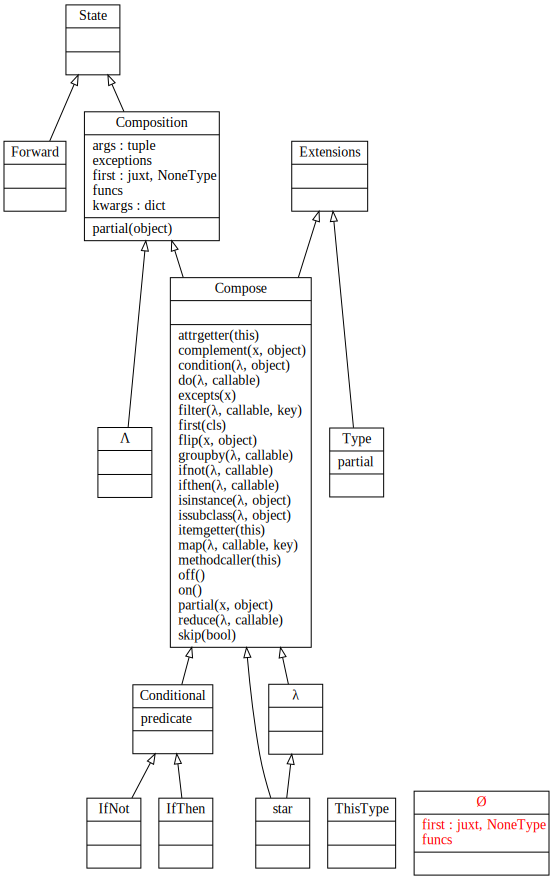

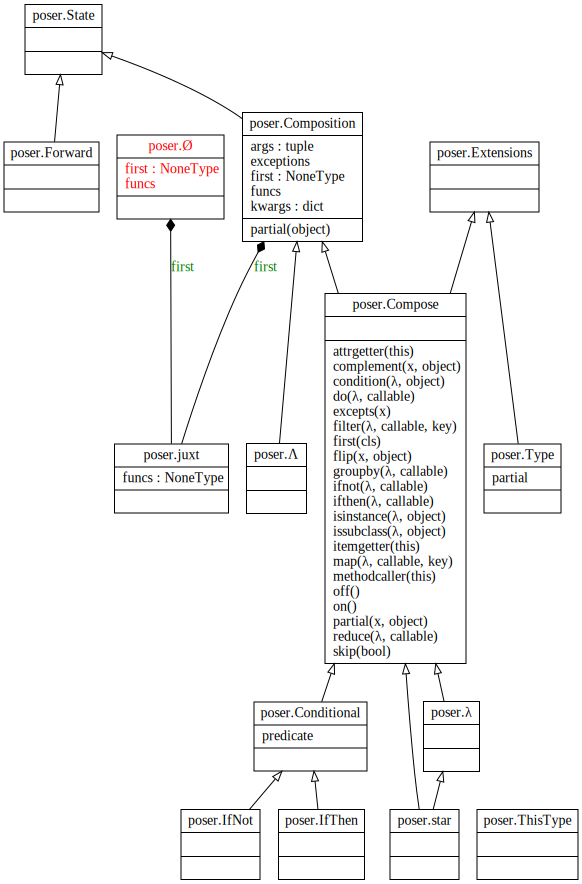

In [23]:
    if __name__ == '__main__': 
        if '__file__' in locals():
            if 'covtest' in __import__('sys').argv:
                print(__import__('doctest').testmod(optionflags=8))
        else:
            import IPython
            from IPython import get_ipython
            !jupyter nbconvert --to python --TemplateExporter.exclude_input_prompt=True poser.ipynb
            with IPython.utils.capture.capture_output():
                !black poser.py
            !isort poser.py
            !pyflakes poser.py
            !ipython -m coverage -- run poser.py covtest
            !coverage report
            !coverage html
            with IPython.utils.capture.capture_output():
                !pyreverse poser -osvg -pposer
            IPython.display.display(IPython.display.SVG('classes_poser.svg'))
            with IPython.utils.capture.capture_output():
                !pyreverse poser -osvg -pposer -my -s1
            IPython.display.display(IPython.display.SVG('classes_poser.svg'))